<a href="https://colab.research.google.com/github/MaschinenNah/MachineLearningKochbuch03_LambdaSchichten/blob/main/Kantenerkennung_mit_Tensoren.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kanten erkennen mit Tensoren


In [1]:
from keras.layers import Input, Lambda
from keras.models import Model
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

!git clone https://github.com/MaschinenNah/ml_utils
from ml_utils import load
from ml_utils import convert
from ml_utils import show
from ml_utils import frame_predict as fp

# Hier kommen einige unwichtige und störende Warnungen, deshalb:
import warnings
warnings.filterwarnings('ignore')

# Weil Modelle immer Batches verarbeiten, 
# wir uns aber erst einmal einzelne Beispiele anschauen wollen:
def predict_single(model, input):
  input = input[np.newaxis, ...]
  output = model.predict(input)[0]
  return output

Cloning into 'ml_utils'...
remote: Enumerating objects: 121, done.
remote: Counting objects: 100% (121/121), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 121 (delta 56), reused 85 (delta 27), pack-reused 0
Receiving objects: 100% (121/121), 14.38 KiB | 7.19 MiB/s, done.
Resolving deltas: 100% (56/56), done.


In [2]:
zip_url = "http://pitnoack.de/mn/edge_detect/data.zip"
load.load_and_unzip_from_url(zip_url)

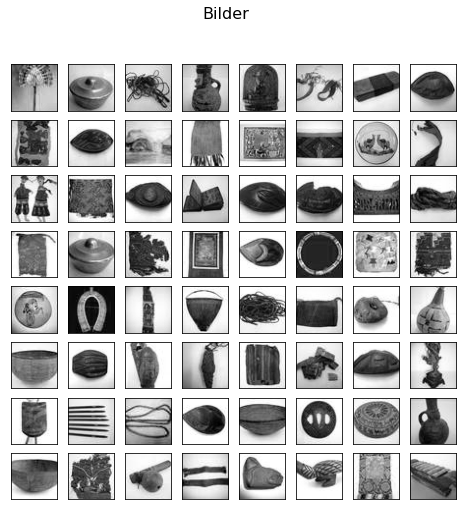

In [3]:
path = "/content/data/img_acute"
image_paths = load.all_abs_paths_in_dir(path)[:64];
nImages = len(image_paths)

acute_images = np.empty( (nImages, 48, 48), "float32")

for idx, image_path in enumerate(image_paths):
  img = load.img_path_to_np_array(image_path)
  img = convert.rgb_to_grayscale(img)
  acute_images[idx] = img

show.show_images_from_np_array(acute_images, "Bilder")

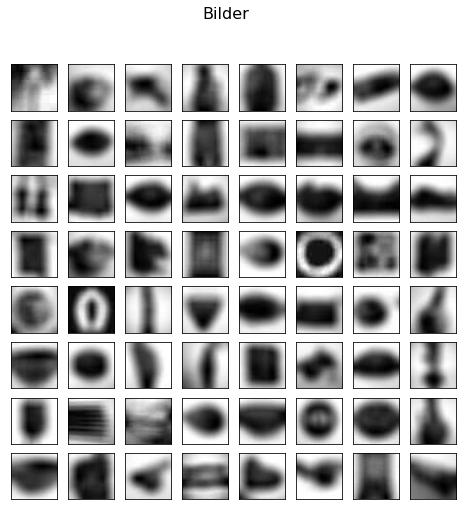

In [4]:
path = "/content/data/img_blurred"
image_paths = load.all_abs_paths_in_dir(path)[:64];
nImages = len(image_paths)

blurred_images = np.empty( (nImages, 48, 48), "float32")

for idx, image_path in enumerate(image_paths):
  img = load.img_path_to_np_array(image_path)
  img = convert.rgb_to_grayscale(img)
  blurred_images[idx] = img

show.show_images_from_np_array(blurred_images, "Bilder")

In [5]:
from keras.layers import Conv2D, Reshape, Lambda, Add

input_shape = (48, 48)
output_shape = (48, 48)

input_layer = Input(shape=input_shape)

x = Reshape((48, 48, 1))(input_layer)

x_kernel = Conv2D(name="x_kernel", filters=1, padding = "same", kernel_size=(3,3))(x)

y_kernel = Conv2D(name="y_kernel", filters=1, padding = "same", kernel_size=(3,3))(x)

x_quad = Lambda(lambda n : n*n)(x_kernel)

y_quad = Lambda(lambda n : n*n)(y_kernel)

x_and_y = Add()([x_quad, y_quad])

x = Reshape((48, 48)) (x_and_y)

output_layer = x

edge_detect = Model(input_layer, output_layer)

x_kernel_weights = np.array([1,0,-1,2,0,-2,1,0,-1])
x_kernel_weights = x_kernel_weights.reshape((3, 3, 1, 1))
x_kernel_weights = [x_kernel_weights, np.array([0])]
edge_detect.get_layer("x_kernel").set_weights(x_kernel_weights)

y_kernel_weights = np.array([1,2,1,0,0,0,-1,-2,-1])
y_kernel_weights = y_kernel_weights.reshape((3, 3, 1, 1))
y_kernel_weights = [y_kernel_weights, np.array([0])]
edge_detect.get_layer("y_kernel").set_weights(y_kernel_weights)

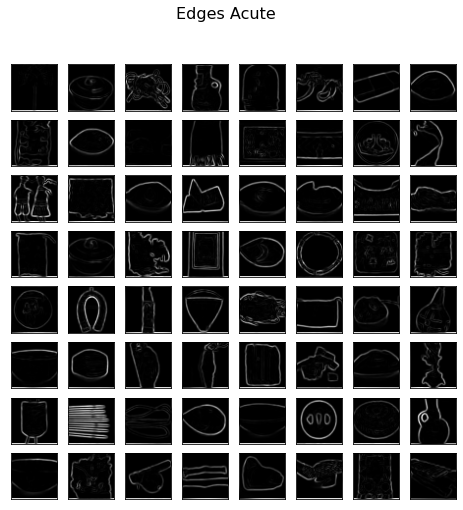

In [6]:
prediction_acute = edge_detect.predict(acute_images)
show.show_images_from_np_array(prediction_acute, "Edges Acute")

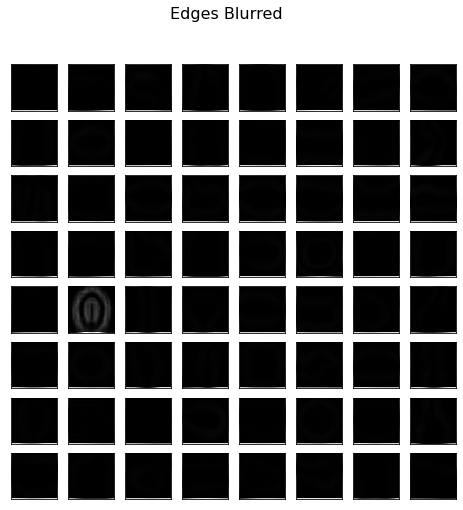

In [7]:
prediction_blurred = edge_detect.predict(blurred_images)
show.show_images_from_np_array(prediction_blurred, "Edges Blurred")

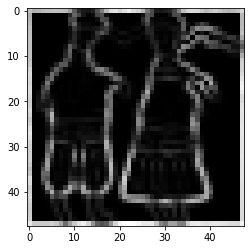

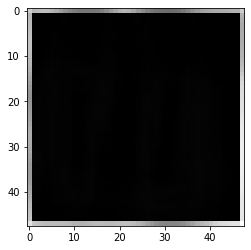

In [10]:
edges_acute = prediction_acute[16]
edges_blurred = prediction_blurred[16]

plt.imshow(edges_acute, cmap="gray")
plt.show()
plt.imshow(edges_blurred, cmap="gray")
plt.show()

In [28]:
from keras.layers import Conv2D, Reshape, Lambda, Add

input_shape = (48, 48)
output_shape = (46, 46)

input_layer = Input(shape=input_shape)

x = Reshape((48, 48, 1))(input_layer)

x_kernel = Conv2D(name="x_kernel", filters=1, kernel_size=(3,3))(x)

y_kernel = Conv2D(name="y_kernel", filters=1, kernel_size=(3,3))(x)

x_quad = Lambda(lambda n : n*n)(x_kernel)

y_quad = Lambda(lambda n : n*n)(y_kernel)

x_and_y = Add()([x_quad, y_quad])

x = Reshape((46, 46)) (x_and_y)

output_layer = x

edge_detect_02 = Model(input_layer, output_layer)

x_kernel_weights = np.array([1,0,-1,2,0,-2,1,0,-1])
x_kernel_weights = x_kernel_weights.reshape((3, 3, 1, 1))
x_kernel_weights = [x_kernel_weights, np.array([0])]
edge_detect_02.get_layer("x_kernel").set_weights(x_kernel_weights)

y_kernel_weights = np.array([1,2,1,0,0,0,-1,-2,-1])
y_kernel_weights = y_kernel_weights.reshape((3, 3, 1, 1))
y_kernel_weights = [y_kernel_weights, np.array([0])]
edge_detect_02.get_layer("y_kernel").set_weights(y_kernel_weights)

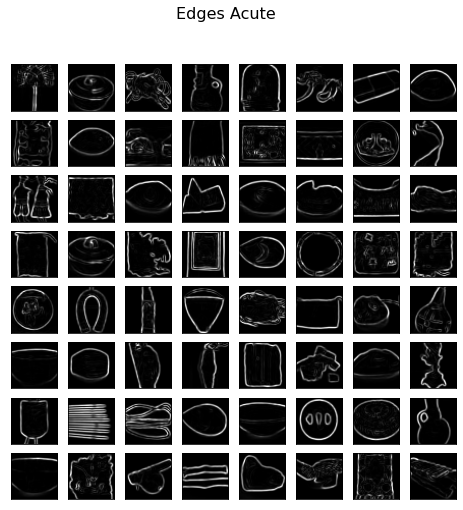

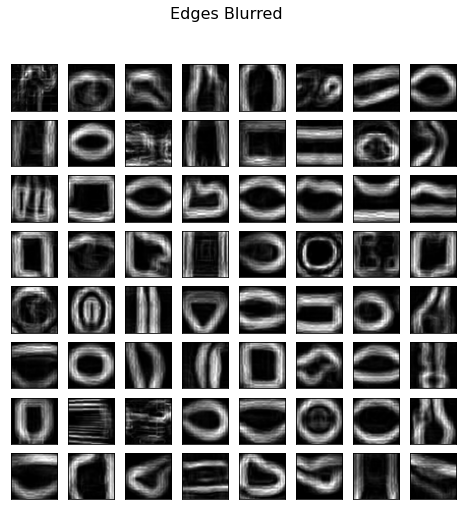

In [29]:
prediction_acute = edge_detect_02.predict(acute_images)
show.show_images_from_np_array(prediction_acute, "Edges Acute")

prediction_blurred = edge_detect_02.predict(blurred_images)
show.show_images_from_np_array(prediction_blurred, "Edges Blurred")

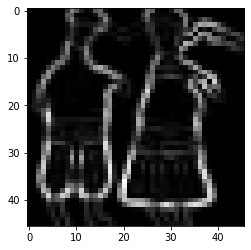

min:  1.3397379e-05
max:  12.011859


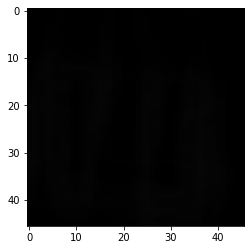

min:  3.3489591e-06
max:  0.3235767


In [36]:
edges_acute = prediction_acute[16]
edges_blurred = prediction_blurred[16]

plt.imshow(edges_acute, cmap="gray", vmax=12)
plt.show()
print("min: ", edges_acute.min());
print("max: ", edges_acute.max());
plt.imshow(edges_blurred, cmap="gray", vmax=12)
plt.show()
print("min: ", edges_blurred.min());
print("max: ", edges_blurred.max());


In [ ]:
tf.reduce_sum(input_layer, axis=[2,3])

In [50]:
from keras.layers import Conv2D, Reshape, Lambda, Add

input_shape = (48, 48)
output_shape = (1)

input_layer = Input(shape=input_shape)

x = Reshape((48, 48, 1))(input_layer)

x_kernel = Conv2D(name="x_kernel", filters=1, kernel_size=(3,3))(x)

y_kernel = Conv2D(name="y_kernel", filters=1, kernel_size=(3,3))(x)

x_quad = Lambda(lambda n : n*n)(x_kernel)

y_quad = Lambda(lambda n : n*n)(y_kernel)

x_and_y = Add()([x_quad, y_quad])

sum = tf.reduce_sum(x_and_y, axis=[1,2,3])

normalized = Lambda( lambda n : 1/n)(sum)

output_layer = normalized

edge_detect_03 = Model(input_layer, output_layer)

x_kernel_weights = np.array([1,0,-1,2,0,-2,1,0,-1])
x_kernel_weights = x_kernel_weights.reshape((3, 3, 1, 1))
x_kernel_weights = [x_kernel_weights, np.array([0])]
edge_detect_03.get_layer("x_kernel").set_weights(x_kernel_weights)

y_kernel_weights = np.array([1,2,1,0,0,0,-1,-2,-1])
y_kernel_weights = y_kernel_weights.reshape((3, 3, 1, 1))
y_kernel_weights = [y_kernel_weights, np.array([0])]
edge_detect_03.get_layer("y_kernel").set_weights(y_kernel_weights)

In [51]:
edge_detect_03.predict(acute_images)

array([0.01052823, 0.00174846, 0.00065818, 0.00109049, 0.00145166,
       0.00098057, 0.00110667, 0.00093029, 0.00083932, 0.00081705,
       0.00726064, 0.00086413, 0.00102285, 0.00123897, 0.0009049 ,
       0.00087169, 0.0003434 , 0.00075654, 0.00096986, 0.00062393,
       0.00087992, 0.00090389, 0.00061075, 0.00083022, 0.00087374,
       0.00182208, 0.00042651, 0.00038623, 0.00069066, 0.0011643 ,
       0.000814  , 0.00059176, 0.00147729, 0.00125679, 0.00108938,
       0.00069538, 0.00052922, 0.00068943, 0.00123353, 0.00114968,
       0.00135908, 0.00073318, 0.0010377 , 0.00126364, 0.00060641,
       0.00079821, 0.00124896, 0.00091333, 0.00079318, 0.00015313,
       0.0017843 , 0.00067496, 0.00179268, 0.00040812, 0.00113517,
       0.00076899, 0.00127772, 0.00071794, 0.0011984 , 0.00068477,
       0.00091824, 0.00072502, 0.00093029, 0.00149435], dtype=float32)

In [52]:
edge_detect_03.predict(blurred_images)

array([0.26981962, 0.01469355, 0.00759684, 0.01003978, 0.00930323,
       0.0173969 , 0.00605699, 0.00488248, 0.0083662 , 0.00404582,
       0.06791035, 0.0090237 , 0.01193735, 0.0061189 , 0.01904518,
       0.00676588, 0.00484176, 0.00789626, 0.00435975, 0.00534765,
       0.0036134 , 0.00458649, 0.00432345, 0.00401073, 0.00848518,
       0.01473549, 0.00475732, 0.00731716, 0.00477913, 0.04677996,
       0.01723662, 0.00458425, 0.02808918, 0.01514492, 0.00781066,
       0.00568017, 0.00418404, 0.00418748, 0.00651426, 0.00956355,
       0.01081126, 0.00401103, 0.00579833, 0.00774374, 0.00442072,
       0.00591865, 0.00507995, 0.00752127, 0.00625417, 0.01293013,
       0.0821925 , 0.00338022, 0.01010198, 0.00348202, 0.00956264,
       0.00603009, 0.00624971, 0.00758461, 0.00690942, 0.01433139,
       0.00801398, 0.00534458, 0.01032824, 0.01044339], dtype=float32)